In [5]:
from utils.download_img import ImageDownloader
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import torch
import pandas as pd
import os
import random

In [9]:
import warnings
warnings.filterwarnings("ignore")

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
curr_path = os.getcwd()
loader_root = curr_path + "/data"
percent = 100  
num_images = 200  # Number of images to download

downloader = ImageDownloader(loader_root)
downloader.download_painting(percent=percent)

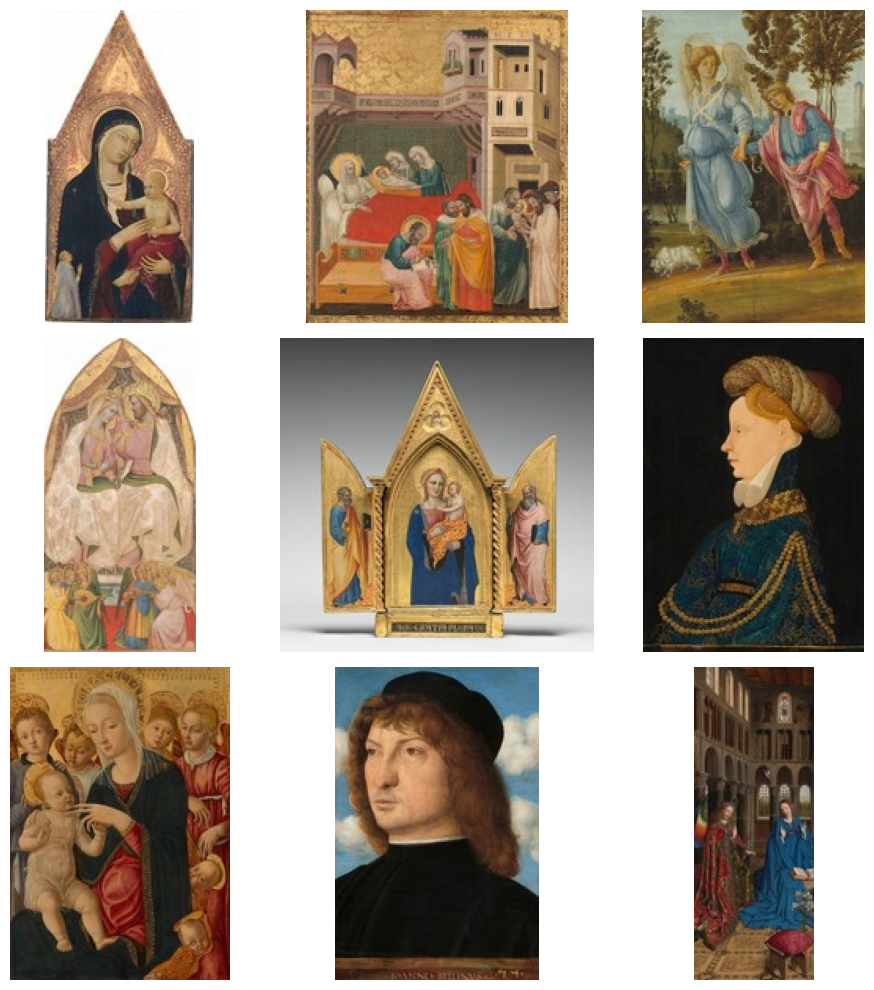

In [16]:
folder_path = './data/images'
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
selected_images = random.sample(image_files, 9)


fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, image_file in enumerate(selected_images):
    img_path = os.path.join(folder_path, image_file)
    img = Image.open(img_path)
    axes[i // 3, i % 3].imshow(img)
    axes[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
 #iiifThumbURL        character varying(512).		An example of the IIIF URL for the image that generates a small thumbnail sized to fit in a 200x200 pixel box

In [ ]:
len(os.listdir('./data/images'))

In [17]:
#objectid10 이 에러가 나는 중
# Path to the directory containing the images
images_dir = "./data/images"

# Path to the merged.csv file
csv_file = "./data/merged.csv"

# Get a list of all filenames in the images directory
image_filenames = [filename.split(".")[0] for filename in os.listdir(images_dir) if filename.endswith(".jpg")]

# Read the merged.csv file and extract the objectid column
df = pd.read_csv(csv_file)
csv_objectids = df['objectid'].astype(str).tolist()
print(len(csv_objectids))
# Find non-matching filenames
non_matching_filenames = set(image_filenames) - set(csv_objectids)

# Print non-matching filenames
print("Non-matching filenames:")
for filename in non_matching_filenames:
    print(filename)


156
Non-matching filenames:


In [18]:
# merge 하는 데이터 프레임에 url오류 있는게 drop 안되는 오류 고쳐야함
df = pd.read_csv('./data/merged.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   objectid      156 non-null    int64 
 1   element       156 non-null    object
 2   iiifthumburl  156 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.8+ KB


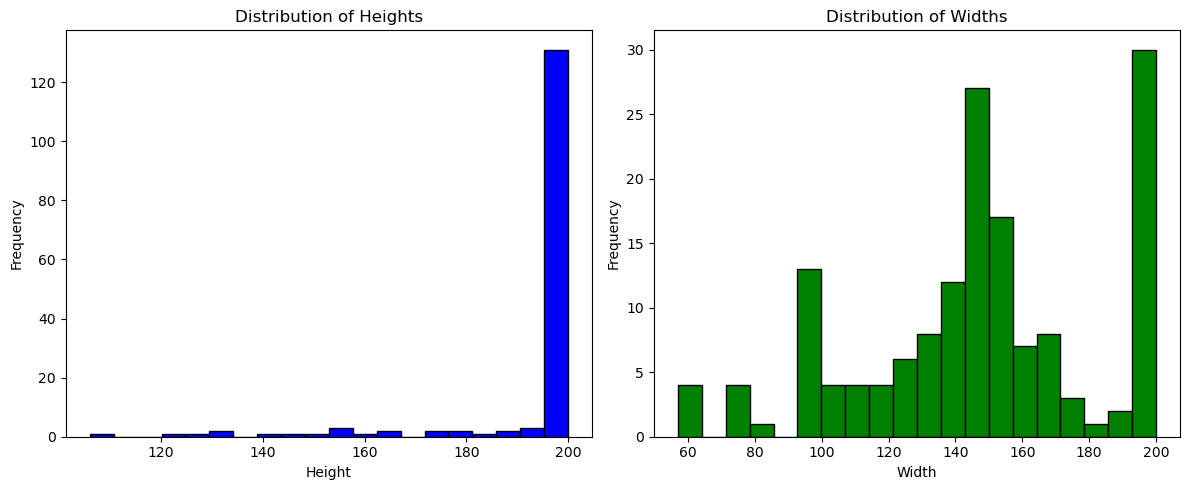

In [19]:
heights = []
widths = []

for image_file in image_files:
    path = os.path.join(folder_path+'/'+image_file)
    img = Image.open(path)
    width, height = img.size
    widths.append(width)
    heights.append(height)

# Create subplots for height and width histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotting histogram for heights
ax1.hist(heights, bins=20, color='blue', edgecolor='black')
ax1.set_xlabel('Height')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Heights')

# Plotting histogram for widths
ax2.hist(widths, bins=20, color='green', edgecolor='black')
ax2.set_xlabel('Width')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Widths')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# think about how to crop the images

In [1]:
import utils.retrieve
from utils.data_loader import ImageDataset
from models import extractor
from models.extractor import VGGCompressor, ResNetCompressor, UNetCompressor
from utils.retrieve import ImageRetrieval
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = './data/images/0.jpg'
image = Image.open(image_path)
image = image.convert("RGB")

# Define transformations to be applied to the image
transform = transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Resize((200,200)),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                ])

# Apply transformations to the image
image_tensor = transform(image).unsqueeze(0)  # Add a batch dimension
print(image_tensor.shape)

# Initialize the UNetCompressor
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
unet_compressor = UNetCompressor(device=device)

# Extract features using the UNetCompressor
features = unet_compressor.extract(image_tensor)

# Convert the features tensor back to an image
# reconstructed_image = transforms.ToPILImage()(features.squeeze(0).cpu())

# palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
# colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
# colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(features.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r)
# plt.show()


torch.Size([1, 3, 200, 200])


Using cache found in /home/jovyan/.cache/torch/hub/pytorch_vision_v0.10.0


torch.Size([1, 3, 200, 200])


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 256, 1, 1])

In [ ]:
unet = UNetCompressor(device=device)
unet_img = ImageRetrieval(unet,data_path,device=device)

In [3]:
data_path = "./data/images"
resnet = ResNetCompressor(device=device)
resnet_img = ImageRetrieval(resnet,data_path,device=device)

Using cache found in /home/jovyan/.cache/torch/hub/pytorch_vision_v0.9.0


Building feature vector list


  0%|          | 0/5 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,
100%|██████████| 5/5 [00:10<00:00,  2.13s/it]


0
145


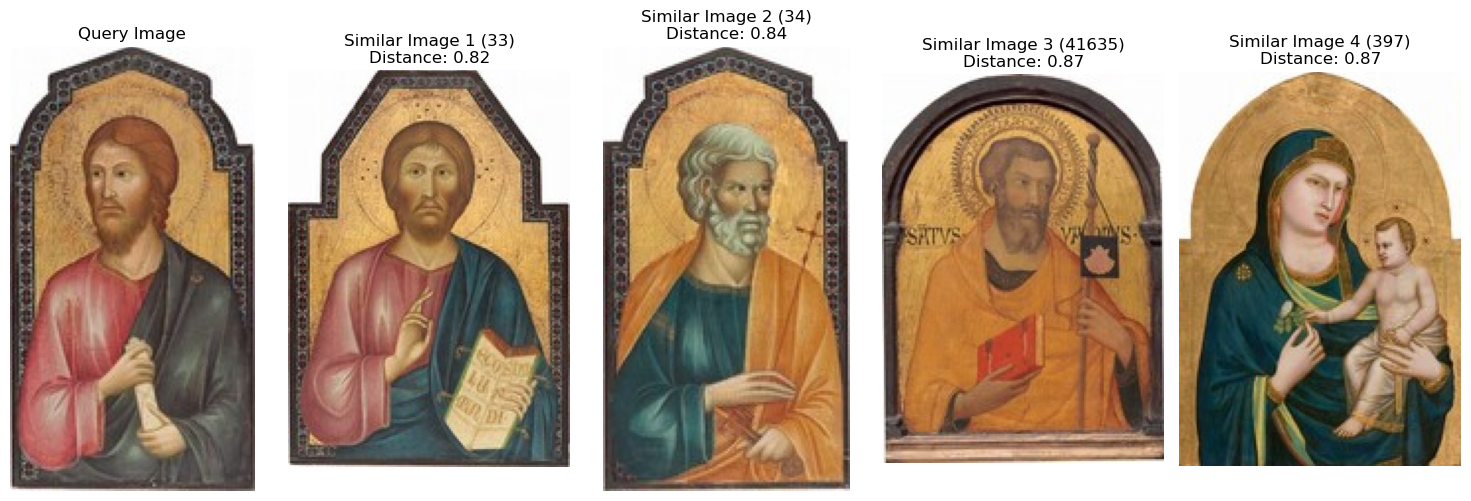

In [5]:
query_image_path = "./data/images/0.jpg"
metric = 'cosine'
similar_images = resnet_img.retrieve_similar_images(query_image_path,metric)
resnet_img.visualize_images(similar_images,query_image_path)

45886
41


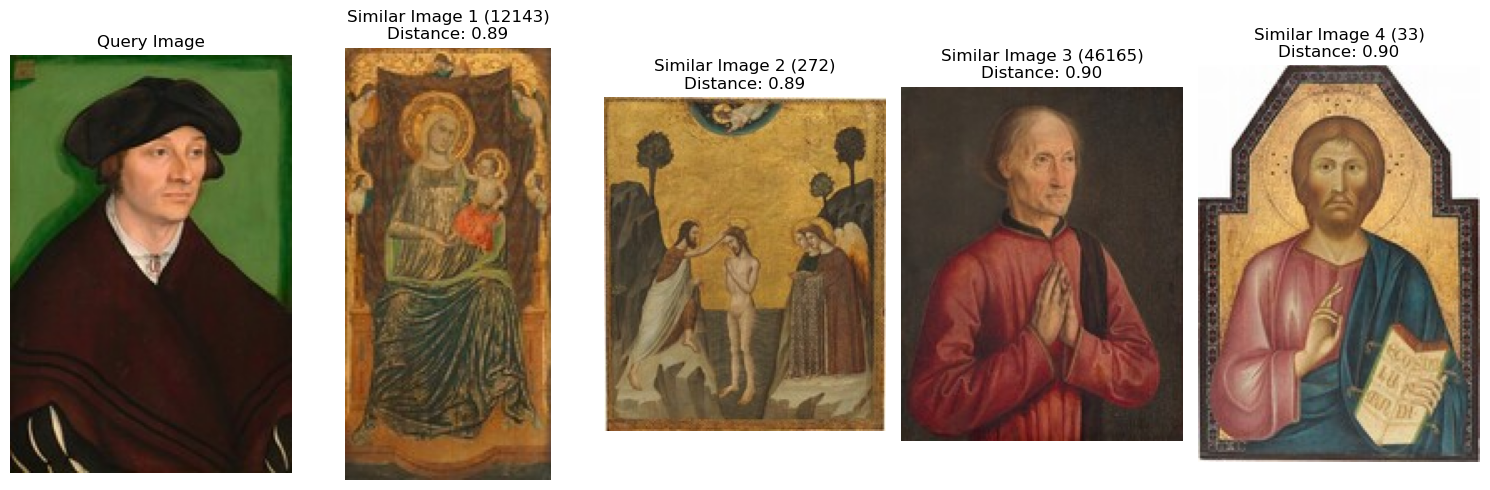

In [4]:
query_image_path = "./data/images/45886.jpg"
metric = 'cosine'
similar_images = resnet_img.retrieve_similar_images(query_image_path,metric)
resnet_img.visualize_images(similar_images,query_image_path)

284
59


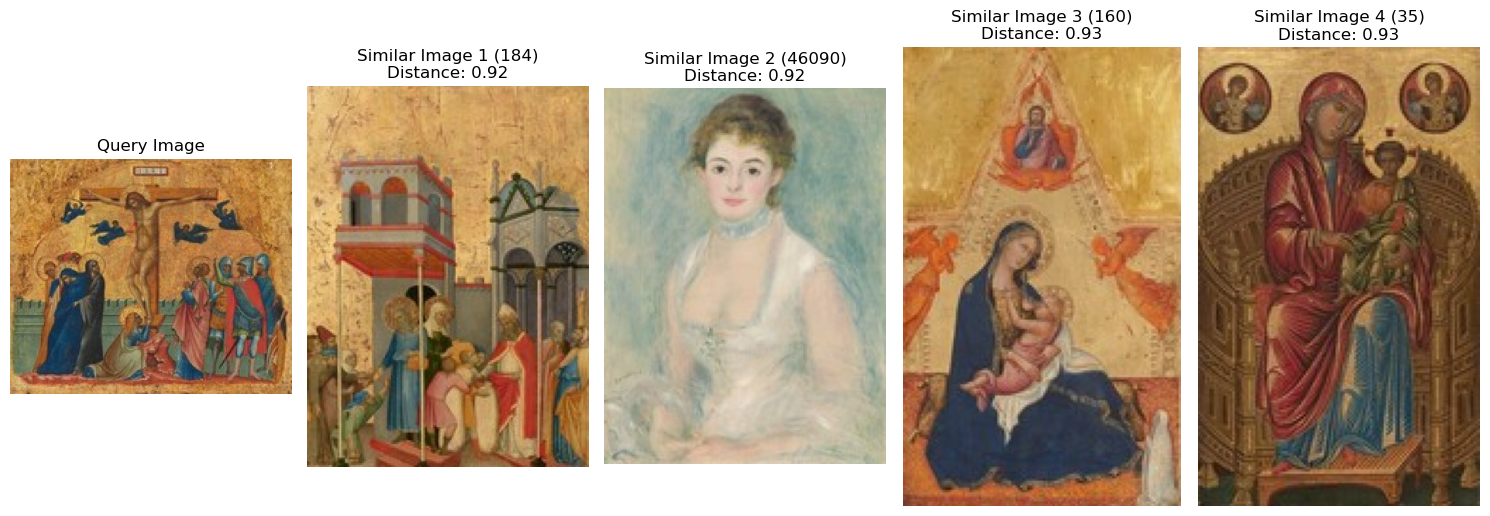

In [6]:
query_image_path = "./data/images/284.jpg"
metric = 'cosine'
similar_images = resnet_img.retrieve_similar_images(query_image_path,metric)
resnet_img.visualize_images(similar_images,query_image_path)

In [7]:
query_image_path = "./data/images/176886.jpg"
metric = 'cosine'
similar_images = resnet_img.retrieve_similar_images(query_image_path,metric)
resnet_img.visualize_images(similar_images,query_image_path)

176886
154


IndexError: index 155 is out of bounds for axis 0 with size 155

In [ ]:
!pip install facenet-pytorch

In [ ]:
from facenet_pytorch import MTCNN
help(MTCNN)

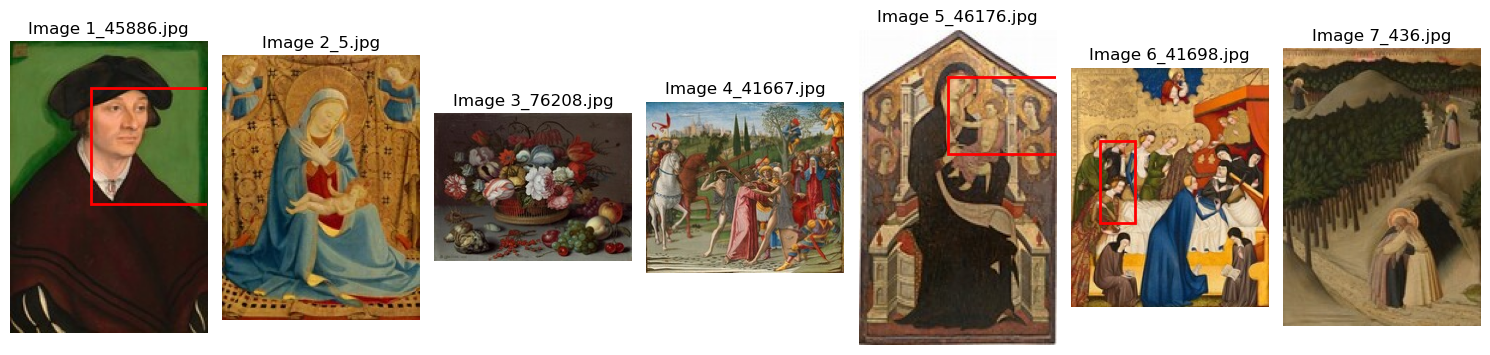

In [4]:
import os
import random
from facenet_pytorch import MTCNN
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

device = 'cuda' if torch.cuda.is_available() else 'cpu'
def visualize_images_with_bounding_boxes(image_paths):
    """
    Visualize images with bounding boxes around detected faces.
    
    Args:
        image_paths (list): List of file paths to the images.
    """
    # Initialize the MTCNN model
    mtcnn =  MTCNN(min_face_size=2,margin=10,thresholds = [0.6, 0.6, 0.6],device = device,keep_all=True,post_process=True)
    plt.figure(figsize=(15, 6))

    for i, image_path in enumerate(image_paths, start=1):
        img = Image.open(image_path)
        boxes, _ = mtcnn.detect(img)    # Detect faces in the image

        plt.subplot(1, len(image_paths), i)
        plt.imshow(img)
        plt.title(f"Image {i}_{image_path.split('/')[-1]}")

        if boxes is not None:
            for box in boxes:
                x, y, width, height = box
                rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
                plt.gca().add_patch(rect)

        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Path to the images folder
images_folder = "./data/images"
image_files = os.listdir(images_folder)
sample_images = random.sample(image_files, 7)

# Create list of image paths
image_paths = [os.path.join(images_folder, image_file) for image_file in sample_images]

# Visualize the images with bounding boxes
visualize_images_with_bounding_boxes(image_paths)


In [1]:
# Apply face cropping

import utils.retrieve
from utils.data_loader import ImageDataset
from models import extractor
from models.extractor import VGGCompressor, ResNetCompressor
from utils.retrieve import ImageRetrieval
import torch

data_path = "./data/images"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device : ',device)

resnet = ResNetCompressor(device)
resnet_img = ImageRetrieval(resnet,data_path,face_crop = True,device=device)

device :  cuda


Using cache found in /home/jovyan/.cache/torch/hub/pytorch_vision_v0.9.0


Building feature vector list


  0%|          | 0/5 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,
100%|██████████| 5/5 [00:26<00:00,  5.36s/it]


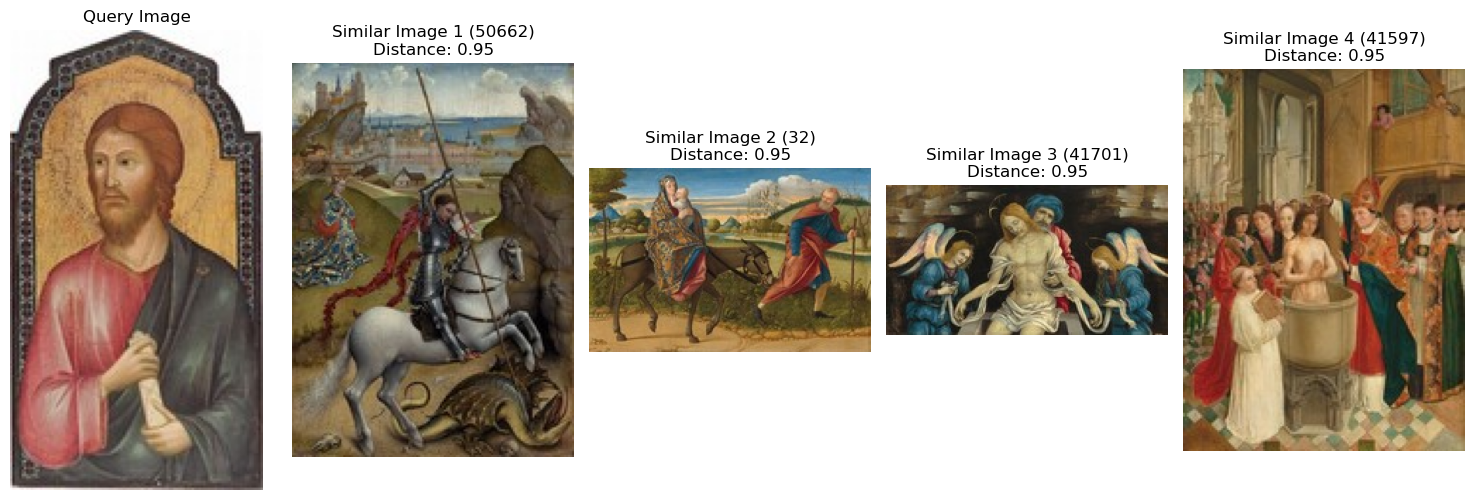

In [2]:
query_image_path = "./data/images/0.jpg"
metric = 'cosine'
similar_images = resnet_img.retrieve_similar_images(query_image_path,metric,True)
resnet_img.visualize_images(similar_images,query_image_path)

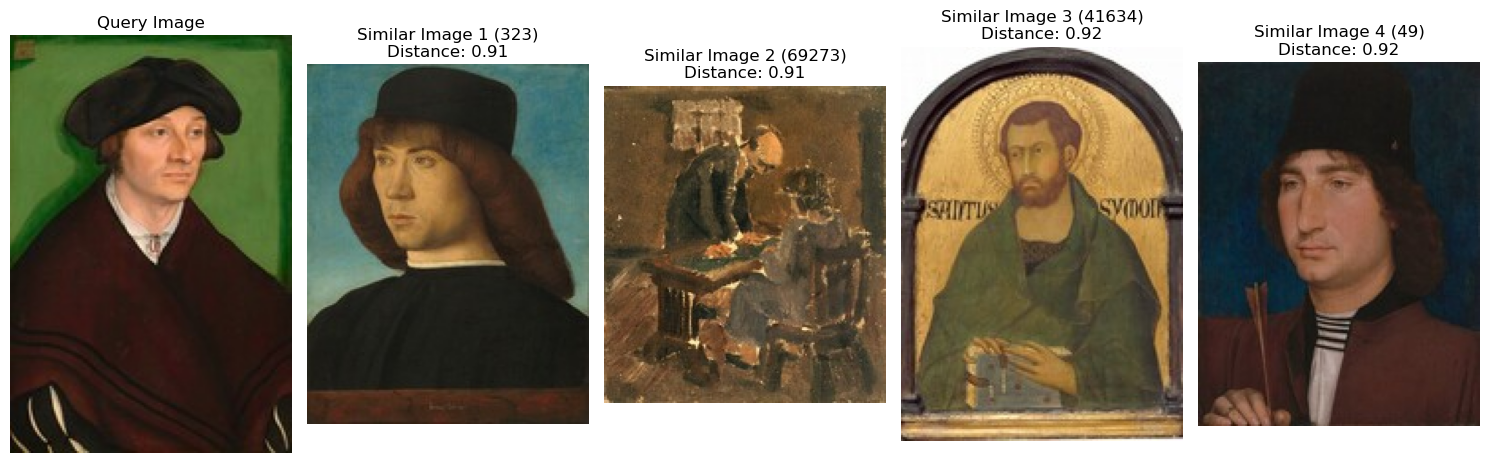

In [4]:
query_image_path = "./data/images/45886.jpg"
metric = 'cosine'
similar_images = resnet_img.retrieve_similar_images(query_image_path,metric,face_crop=True)
resnet_img.visualize_images(similar_images,query_image_path)

In [ ]:
!python main.py --compressor vgg --download --percent 50 --query_image_path "./data/images/0.jpg" --metric cosine